### - Sobhan Moradian Daghigh
#### - 11/25/2021
#### 
#### - ML - EX01 - Q1
##### 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import import_ipynb
from sklearn import preprocessing

#### Reading the dataset

In [2]:
dataset = pd.read_excel('./ML-HW01/dataset2/CSM_dataset.xlsx')
dataset.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               230 non-null    float64
 6   Screens              221 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate Followers  196 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


#### Part A:

In [4]:
dataset.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

#### So we have missing values for cols 'Budget', 'Screens' and 'Aggregate Followers'

#### But before trying to handle these, Im wanna see the correlation matrix to determine how to fill in the missing values.

In [5]:
dataset.corr().style.background_gradient(cmap='coolwarm')

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Year,1.000000,-0.001213,-0.026277,0.122672,0.098516,0.251472,0.103996,0.229858,0.207959,0.084561,0.234496,0.043037,-0.037351
Ratings,-0.001213,1.000000,-0.116735,0.342204,0.288157,0.057625,0.105701,0.143182,0.011710,0.073824,-0.187422,0.015679,0.078545
Genre,-0.026277,-0.116735,1.000000,-0.197009,-0.264286,-0.145807,-0.224474,-0.010831,-0.032047,-0.043544,-0.031730,-0.099919,0.008700
Gross,0.122672,0.342204,-0.197009,1.000000,0.719839,0.586447,0.423711,-0.017100,0.176363,0.110432,0.161536,0.125960,0.301808
Budget,0.098516,0.288157,-0.264286,0.719839,1.000000,0.595684,0.464733,0.033616,0.114708,0.011701,0.096888,0.090559,0.168874
Screens,0.251472,0.057625,-0.145807,0.586447,0.595684,1.000000,0.267456,-0.017046,0.256515,0.173473,0.268176,0.213039,0.210822
Sequel,0.103996,0.105701,-0.224474,0.423711,0.464733,0.267456,1.000000,-0.106769,-0.042763,-0.036089,-0.059792,-0.069333,0.228649
Sentiment,0.229858,0.143182,-0.010831,-0.017100,0.033616,-0.017046,-0.106769,1.000000,0.064134,0.053883,0.040574,0.056372,-0.092922
Views,0.207959,0.011710,-0.032047,0.176363,0.114708,0.256515,-0.042763,0.064134,1.000000,0.677175,0.776105,0.710507,0.155044
Likes,0.084561,0.073824,-0.043544,0.110432,0.011701,0.173473,-0.036089,0.053883,0.677175,1.000000,0.470645,0.917492,0.078575


#### OK lets do filling

#### Screens:

In [6]:
dataset['C2D_Gross'] = pd.cut(dataset.Gross, bins=[0, 30000000, 100000000, 1000000000],labels=['NotGood', 'Good', 'Awesome'])
groups = dataset.groupby(by=['C2D_Gross'])
groups.first()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
C2D_Gross,,,,,,,,,,,,,,
NotGood,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
Good,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
Awesome,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0


In [7]:
for grp, pdf in groups:
    lst = dataset.loc[(dataset.C2D_Gross == grp) & (dataset.Screens.notnull())]['Screens'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.C2D_Gross == grp) & (dataset.Screens.isnull()), ['Screens']] = round(mean)

In [8]:
dataset.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                 0
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
C2D_Gross               0
dtype: int64

#### Budget:

In [9]:
groups = dataset.groupby(by=['Genre'])
groups.first()

,Movie,Year,Ratings,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,C2D_Gross
Genre,,,,,,,,,,,,,,
1,22 Jump Street,2014,7.1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0,Awesome
2,Divergent,2014,6.8,151000000,85000000.0,3936.0,1,-4,463866,3400,152,987,1030000.0,Awesome
3,A Long Way Off,2014,4.6,29000,500000.0,1183.0,1,0,91137,112,7,1,310000.0,NotGood
4,Child 44,2015,6.4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN,NotGood
6,The Loft,2014,6.3,5980000,14000000.0,1841.0,1,2,381071,238,27,43,14586.0,NotGood
7,Locker 13,2014,4.8,2470,300000.0,3.0,1,0,30529,18,4,2,18100.0,NotGood
8,13 Sins,2014,6.3,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0,NotGood
9,Cantinflas,2014,6.7,6370000,3000000.0,382.0,1,3,2902492,9522,558,2296,13720000.0,NotGood
10,A Walk Among the Tombstones,2014,6.5,26000000,28000000.0,2714.0,1,3,2213659,2210,419,382,125646.0,NotGood


In [10]:
for grp, pdf in groups:
    lst = dataset.loc[(dataset.Genre == grp) & (dataset.Budget.notnull())]['Budget'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.Genre == grp) & (dataset.Budget.isnull()), ['Budget']] = round(mean)

In [11]:
dataset.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  0
Screens                 0
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
C2D_Gross               0
dtype: int64

#### Aggregate Followers:

In [12]:
groups = dataset.groupby(by=['C2D_Gross', 'Genre'])
groups.first()

Movie    Year  Ratings  \
C2D_Gross Genre                                                       
NotGood   1                    A Most Violent Year  2014.0      7.1   
          2                            The Admiral  2014.0      7.1   
          3                         A Long Way Off  2014.0      4.6   
          4                               Child 44  2015.0      6.4   
          6                               The Loft  2014.0      6.3   
          7                              Locker 13  2014.0      4.8   
          8                                13 Sins  2014.0      6.3   
          9                             Cantinflas  2014.0      6.7   
          10           A Walk Among the Tombstones  2014.0      6.5   
          12                                   NaN     NaN      NaN   
          15                           Devil's Due  2014.0      4.0   
Good      1                         3 Days to Kill  2014.0      6.2   
          2                          Earth to Echo  2014.0      5.8   
          3                         Dolphin Tale 2  2014.0      6.4   
          4                                    NaN     NaN      NaN   
          6                      The Boy Next Door  2015.0      4.6   
          7                                    NaN     NaN      NaN   
          8      A Million Ways to Die in the West  2014.0      6.1   
          9                            Jersey Boys  2014.0      6.9   
          10                  Deliver Us from Evil  2014.0      6.2   
          12                Penguins of Madagascar  2014.0      6.8   
          15                             Annabelle  2014.0      5.4   
Awesome   1                         22 Jump Street  2014.0      7.1   
          2                              Divergent  2014.0      6.8   
          3                              Gone Girl  2014.0      8.2   
          4                                    NaN     NaN      NaN   
          6                                    NaN     NaN      NaN   
          7                                    NaN     NaN      NaN   
          8                              Neighbors  2014.0      6.4   
          9                               Unbroken  2014.0      7.2   
          10                                   NaN     NaN      NaN   
          12                            Big Hero 6  2014.0      7.9   
          15                                   NaN     NaN      NaN   

                       Gross       Budget  Screens  Sequel  Sentiment  \
C2D_Gross Genre                                                         
NotGood   1        5750000.0   20000000.0    818.0     1.0        2.0   
          2        2590000.0    9500000.0   1586.0     1.0        3.0   
          3          29000.0     500000.0   1183.0     1.0        0.0   
          4        1210000.0   50000000.0     66.0     1.0        4.0   
          6        5980000.0   14000000.0   1841.0     1.0        2.0   
          7           2470.0     300000.0      3.0     1.0        0.0   
          8           9130.0    4000000.0     45.0     1.0        0.0   
          9        6370000.0    3000000.0    382.0     1.0        3.0   
          10      26000000.0   28000000.0   2714.0     1.0        3.0   
          12             NaN          NaN      NaN     NaN        NaN   
          15      15800000.0    7000000.0   2544.0     1.0        0.0   
Good      1       30700000.0   28000000.0   2872.0     1.0        0.0   
          2       38900000.0   13000000.0   3230.0     1.0        0.0   
          3       42000000.0   36000000.0   3376.0     2.0       -1.0   
          4              NaN          NaN      NaN     NaN        NaN   
          6       35400000.0    4000000.0   2602.0     1.0       16.0   
          7              NaN          NaN      NaN     NaN        NaN   
          8       42600000.0   40000000.0   3158.0     1.0        0.0   
          9       47000000.0   40000000.0   2905.0     1.0       10.0   
          10      30500000

In [13]:
for grp, pdf in groups:
    lst = dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.Genre == grp[1]) & (dataset.loc[:, 'Aggregate Followers'].notnull())]['Aggregate Followers'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.Genre == grp[1]) & (dataset.loc[:, 'Aggregate Followers'].isnull()), ['Aggregate Followers']] = round(mean)
        
    lst = dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.loc[:, 'Aggregate Followers'].notnull())]['Aggregate Followers'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.loc[:, 'Aggregate Followers'].isnull()), ['Aggregate Followers']] = round(mean)

In [14]:
dataset.pop('C2D_Gross')
dataset.isnull().sum()

Movie                  0
Year                   0
Ratings                0
Genre                  0
Gross                  0
Budget                 0
Screens                0
Sequel                 0
Sentiment              0
Views                  0
Likes                  0
Dislikes               0
Comments               0
Aggregate Followers    0
dtype: int64

#### All the missing values handled.

#### Part B:

In [15]:
# sns.set(style="ticks", color_codes=True)    
# g = sns.pairplot(dataset)
# plt.show()

#### Part D:

In [17]:
import Ex01_Q1 as Q1

In [18]:
dataset['Ratings'] = dataset.pop('Ratings')
dataset.insert(loc=1, column='Bias', value=[1] * dataset.shape[0])

#### Normalizing

In [244]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset.iloc[:, 2:].values)
scaled_dataset = pd.DataFrame(x_scaled, columns=['Year','Genre', 'Gross', 'Budget', 'Screens', 'Sequel', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers', 'Ratings'])
scaled_dataset.insert(loc=0, column='Movie', value=dataset.iloc[:, 0])
scaled_dataset.insert(loc=1, column='Bias', value=dataset.iloc[:, 1])

scaled_dataset.iloc[:, 2:-1] += 0.0005

scaled_dataset.head()

,Movie,Bias,Year,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,Ratings
0,13 Sins,1,0.0005,0.5005,0.000510,0.016224,0.010449,0.000500,0.567664,0.101028,0.012998,0.030944,0.017078,0.036561,0.571429
1,22 Jump Street,1,0.0005,0.0005,0.299098,0.200276,0.764961,0.167167,0.597515,0.018357,0.009848,0.004870,0.005348,0.398481,0.714286
2,3 Days to Kill,1,0.0005,0.0005,0.048241,0.112251,0.664544,0.000500,0.567664,0.009823,0.001382,0.002936,0.001725,0.016032,0.553571
3,300: Rise of an Empire,1,0.0005,0.0005,0.165349,0.440343,0.802906,0.167167,0.567664,0.014361,0.007052,0.009956,0.015879,0.018771,0.571429
4,A Haunted House 2,1,0.0005,0.5005,0.027401,0.014224,0.534512,0.167167,0.567664,0.096891,0.033321,0.044196,0.028704,0.062466,0.285714


In [245]:
# scaled_dataset.insert(loc=5, column='Gross2', value=np.power(scaled_dataset.iloc[:, 4], 2))
# scaled_dataset.insert(loc=7, column='Budget2', value=np.multiply(scaled_dataset.iloc[:, 6], 2))

# scaled_dataset.head()

#### Split data into 80% of train and 20% of test.

In [246]:
x_train, x_test, y_train, y_test = train_test_split(scaled_dataset.iloc[:,:-1], scaled_dataset.iloc[:, -1], train_size=0.8, shuffle=True)

In [247]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [248]:
train.head()

,Movie,Bias,Year,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,Ratings
123,The Good Lie,1,0.0005,0.143357,0.004726,0.080242,0.106701,0.000500,0.716918,0.040436,0.009419,0.015615,0.015202,0.024952,0.767857
133,The Lego Movie,1,0.0005,0.786214,0.401742,0.240287,0.873475,0.000500,0.537813,0.013939,0.005482,0.008021,0.008033,0.151615,0.839286
183,Paul Blart: Mall Cop 2,1,1.0005,0.000500,0.110916,0.120254,0.020861,0.167167,0.791545,0.073713,0.024270,0.067477,0.023752,0.052611,0.214286
65,Left Behind,1,0.0005,0.000500,0.022269,0.064238,0.422295,0.000500,0.567664,0.172476,0.030687,0.151718,0.198477,0.004230,0.000000
124,The Hobbit: The Battle of the Five Armies,1,0.0005,0.071929,0.397076,1.000500,0.896613,0.833833,0.612440,0.109416,0.038689,0.019268,0.046951,0.084677,0.785714


In [259]:
# Data count
m = train.shape[0]

degree = train.shape[1] - 3 # 12 features
epoch = 5000

coeffs, mr_lr_ep = Q1.gd(epoch=epoch, degree=degree, df_train=train.iloc[:, 1:], df_test=test.iloc[:, 1:], 
                  size=m, alpha=0.06, decay=0.0001) #decay:0.00003
train_pred = Q1.predY_cal(coeffs, train.iloc[:, 1:], degree=degree)
test_pred = Q1.predY_cal(coeffs, test.iloc[:, 1:], degree=degree)

tr_RMSE = mean_squared_error(train.iloc[:, -1], train_pred, squared=False)
ts_RMSE = mean_squared_error(test.iloc[:, -1], test_pred, squared=False)

tr_R2Score = r2_score(train.iloc[:, -1], train_pred)
ts_R2Score = r2_score(test.iloc[:, -1], test_pred)

print('Test RMSE: {:.2f} , Train RMSE: {:.2f}'.format(ts_RMSE, tr_RMSE))
print('Test R2Score: {:.2f} , Train R2Score: {:.2f}'.format(ts_R2Score, tr_R2Score))  

KeyboardInterrupt: 

In [254]:
# without Gross2
# Test RMSE: 0.16 , Train RMSE: 0.15
# Test R2Score: 0.25 , Train R2Score: 0.24

In [255]:
## Test
# decays = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
# alphas = [0.6, 0.7, 0.8, 0.9, 1]

In [256]:
# for alpha in alphas:
#     for decay in decays:
#         m = train.shape[0]

#         degree = train.shape[1] - 3 # 12 features
#         epoch = 1000

#         coeffs, mr_lr_ep = Q1.gd(epoch=epoch, degree=degree, df_train=train.iloc[:, 1:], df_test=test.iloc[:, 1:], 
#                           size=m, alpha=alpha, decay=decay) #decay:0.00003
#         train_pred = Q1.predY_cal(coeffs, train.iloc[:, 1:], degree=degree)
#         test_pred = Q1.predY_cal(coeffs, test.iloc[:, 1:], degree=degree)
        
#         tr_RMSE = mean_squared_error(train.iloc[:, -1], train_pred, squared=False)
#         ts_RMSE = mean_squared_error(test.iloc[:, -1], test_pred, squared=False)

#         tr_R2Score = r2_score(train.iloc[:, -1], train_pred)
#         ts_R2Score = r2_score(test.iloc[:, -1], test_pred)

#         print(alpha, decay)
#         print('Test RMSE: {:.2f} , Train RMSE: {:.2f}'.format(ts_RMSE, tr_RMSE))
#         print('Test R2Score: {:.2f} , Train R2Score: {:.2f}'.format(ts_R2Score, tr_R2Score)) 
#         print('\n\n')

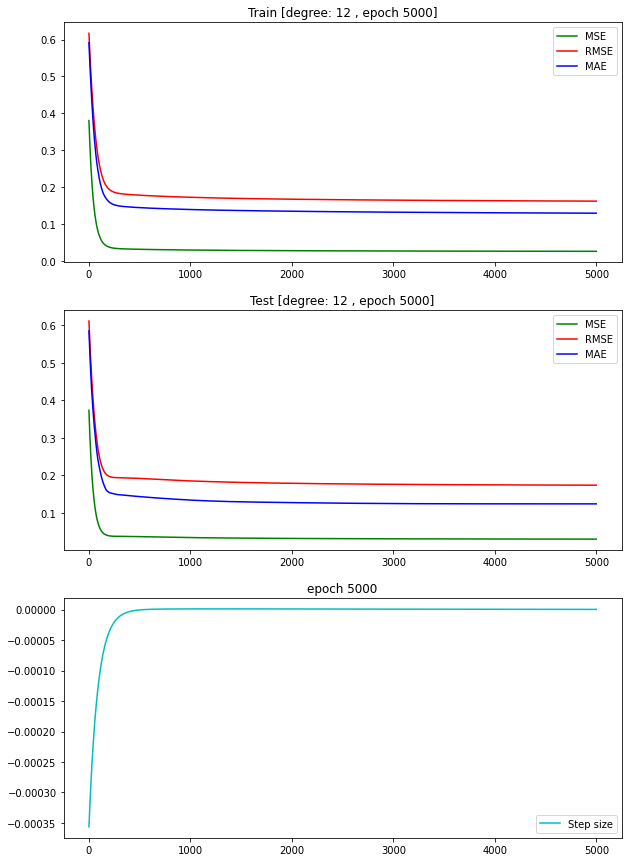

In [257]:
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].set_title('Train [degree: {} , epoch {}]'.format(degree, epoch))
axs[0].plot(mr_lr_ep[2], mr_lr_ep[0][0][0], 'g', label='MSE')
axs[0].plot(mr_lr_ep[2], mr_lr_ep[0][0][1], 'r', label='RMSE')
axs[0].plot(mr_lr_ep[2], mr_lr_ep[0][0][2], 'b', label='MAE')
axs[0].legend()        

axs[1].set_title('Test [degree: {} , epoch {}]'.format(degree, epoch))
axs[1].plot(mr_lr_ep[2], mr_lr_ep[0][1][0], 'g', label='MSE')
axs[1].plot(mr_lr_ep[2], mr_lr_ep[0][1][1], 'r', label='RMSE')
axs[1].plot(mr_lr_ep[2], mr_lr_ep[0][1][2], 'b', label='MAE')
axs[1].legend()        

axs[2].set_title('epoch {}'.format(epoch))
axs[2].plot(mr_lr_ep[2], mr_lr_ep[1], 'c', label='Step size')
axs[2].legend()


In [56]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

new_train = train.copy()
new_test = test.copy()

new_train.pop('Year')
new_test.pop('Year')

new_train.pop('Comments')
new_test.pop('Comments')

# new_train.pop('Gross')
# new_test.pop('Gross')

# new_train.pop('Budget')
# new_test.pop('Budget')

# new_train.pop('Likes')
# new_test.pop('Likes')

# new_train.pop('Screens')
# new_test.pop('Screens')

# new_train.pop('Genre')
# new_test.pop('Genre')

# new_train.pop('Sequel')
# new_test.pop('Sequel')

# new_train.pop('Sentiment')
# new_test.pop('Sentiment')

# new_train.pop('Views')
# new_test.pop('Views')

# new_train.pop('Dislikes')
# new_test.pop('Dislikes')

# new_train.pop('Aggregate Followers')
# new_test.pop('Aggregate Followers')

# Genre	Gross	Budget	Screens	Sequel	Sentiment	Views	Likes	Dislikes	Comments	Aggregate Followers
# Data count
m = train.shape[0]

degree = new_train.shape[1] - 3 # 3: movie + bias + ratings
epoch = 5000

In [57]:
degree

10

In [58]:
coeffs

[0.5855029775300614]

In [59]:
new_train.iloc[:, 1:]

,Bias,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Aggregate Followers,Ratings
7,1,0.000000,0.008939,0.079742,0.188801,0.000000,0.597015,0.056807,0.005953,0.014112,0.004176,0.714286
84,1,0.500000,0.000052,0.002121,0.273253,0.000000,0.567164,0.165608,0.505088,0.225287,0.087626,0.375000
189,1,1.000000,0.073713,0.139759,0.749190,0.000000,0.492537,0.111908,0.037773,0.069413,0.000000,0.339286
140,1,0.500000,0.130479,0.159765,0.741092,0.000000,0.552239,0.259893,0.094643,0.159957,0.087980,0.517857
4,1,0.500000,0.026901,0.013724,0.534012,0.166667,0.567164,0.096391,0.032821,0.043696,0.061966,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...
226,1,0.214286,0.001878,0.199776,0.014808,0.000000,0.626866,0.113417,0.025163,0.045917,0.045604,0.589286
138,1,0.785714,0.099841,0.167767,0.792457,0.000000,0.567164,0.069525,0.008217,0.039112,0.103891,0.482143
69,1,0.000000,0.197509,0.159765,0.733688,0.000000,0.582090,0.035011,0.006328,0.011963,0.159877,0.589286
144,1,0.142857,0.000004,0.046582,0.000000,0.000000,0.567164,0.007752,0.000456,0.000788,0.045604,0.660714


In [60]:
coeffs, mr_lr_ep = Q1.gd(epoch=epoch, degree=degree, df_train=new_train.iloc[:, 1:], df_test=new_test.iloc[:, 1:], 
                  size=m, alpha=0.001, decay=0.0000003)
train_pred = Q1.predY_cal(coeffs, new_train.iloc[:, 1:], degree=degree)
test_pred = Q1.predY_cal(coeffs, new_test.iloc[:, 1:], degree=degree)

tr_RMSE = mean_squared_error(new_train.iloc[:, -1], train_pred, squared=False)
ts_RMSE = mean_squared_error(new_test.iloc[:, -1], test_pred, squared=False)

tr_R2Score = r2_score(new_train.iloc[:, -1], train_pred)
ts_R2Score = r2_score(new_test.iloc[:, -1], test_pred)

print('Test RMSE: {:.2f} , Train RMSE: {:.2f}'.format(ts_RMSE, tr_RMSE)) 
print('Test R2Score: {:.2f} , Train R2Score: {:.2f}'.format(ts_R2Score, tr_R2Score))  

Test RMSE: 0.16 , Train RMSE: 0.18
Test R2Score: 0.04 , Train R2Score: 0.00


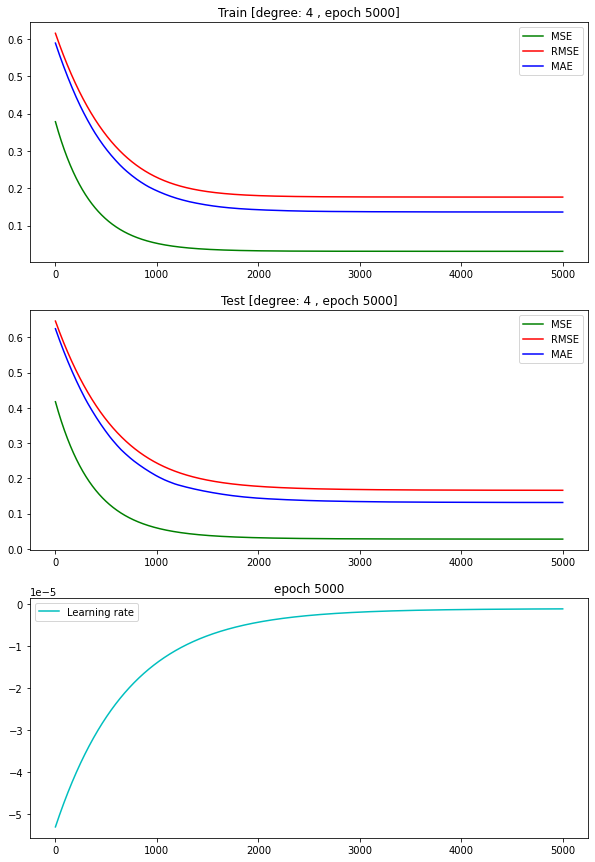

In [41]:
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].set_title('Train [degree: {} , epoch {}]'.format(degree, epoch))
axs[0].plot(mr_lr_ep[2], mr_lr_ep[0][0][0], 'g', label='MSE')
axs[0].plot(mr_lr_ep[2], mr_lr_ep[0][0][1], 'r', label='RMSE')
axs[0].plot(mr_lr_ep[2], mr_lr_ep[0][0][2], 'b', label='MAE')
axs[0].legend()        

axs[1].set_title('Test [degree: {} , epoch {}]'.format(degree, epoch))
axs[1].plot(mr_lr_ep[2], mr_lr_ep[0][1][0], 'g', label='MSE')
axs[1].plot(mr_lr_ep[2], mr_lr_ep[0][1][1], 'r', label='RMSE')
axs[1].plot(mr_lr_ep[2], mr_lr_ep[0][1][2], 'b', label='MAE')
axs[1].legend()        

axs[2].set_title('epoch {}'.format(epoch))
axs[2].plot(mr_lr_ep[2], mr_lr_ep[1], 'c', label='Learning rate')
axs[2].legend()

In [28]:
# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(new_train.iloc[:, 1:-1], new_train.iloc[:, -1])

# print('R2: ', reg.score(new_train.iloc[:, 1:-1], new_train.iloc[:, -1]))
# pred = Q1.predY_cal(reg.coef_, train.iloc[:, 1:], degree=12)
# print('MSE: ', mean_squared_error(train.iloc[:, -1], pred))

In [29]:
# reg.coef_